In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit

In [2]:
data_train = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
data_train.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
threshold = 0.1* data_train.Temp.max()-data_train.Temp.min()

In [4]:
data_train.isnull().sum()

Date    0
Temp    0
dtype: int64

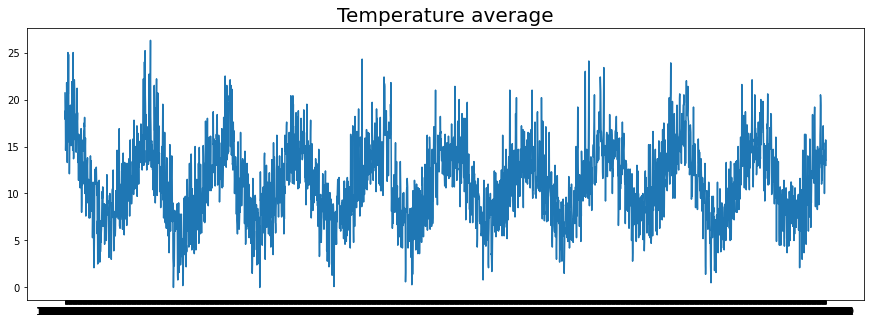

In [5]:
dates = data_train['Date'].values
temp  = data_train['Temp'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [6]:
windowSize=50

In [7]:
X = np.zeros((temp.shape[0]-windowSize,windowSize))
Y = np.zeros(temp.shape[0]-windowSize)

In [ ]:
for i in range(X.shape[0]):
  X[i] = temp[i:i+50]
  Y[i] = temp[i+50]

In [11]:
Splitdata = int(temp.shape[0]*0.8)

In [12]:
X_latih,X_tes,Y_latih,Y_tes = X[:Splitdata],X[Splitdata:],Y[:Splitdata],Y[Splitdata:]

In [30]:
X_latih= np.expand_dims(X_latih,axis=-1)
X_tes = np.expand_dims(X_tes,axis=-1)

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_mae')<threshold):
      print("\n MAE < 10%*skala!")
      self.model.stop_training = True
callbacks = myCallback()

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50,input_shape=(50,1)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                10400     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(X_latih,Y_latih,epochs=100,verbose=1,validation_data=(X_tes,Y_tes))

Epoch 1/100
92/92 [==============================] - 1s 15ms/step - loss: 2.1223 - mae: 2.5783 - val_loss: 1.9882 - val_mae: 2.4444
Epoch 2/100
92/92 [==============================] - 1s 15ms/step - loss: 1.9953 - mae: 2.4488 - val_loss: 1.8539 - val_mae: 2.3044
Epoch 3/100
92/92 [==============================] - 1s 15ms/step - loss: 1.8944 - mae: 2.3455 - val_loss: 1.7714 - val_mae: 2.2216
Epoch 4/100
92/92 [==============================] - 1s 14ms/step - loss: 1.8267 - mae: 2.2755 - val_loss: 1.6929 - val_mae: 2.1348
Epoch 5/100
92/92 [==============================] - 1s 15ms/step - loss: 1.7757 - mae: 2.2252 - val_loss: 1.6443 - val_mae: 2.0859
Epoch 6/100
92/92 [==============================] - 1s 14ms/step - loss: 1.7388 - mae: 2.1888 - val_loss: 1.5977 - val_mae: 2.0401
Epoch 7/100
92/92 [==============================] - 1s 14ms/step - loss: 1.7110 - mae: 2.1586 - val_loss: 1.5877 - val_mae: 2.0279
Epoch 8/100
92/92 [==============================] - 1s 14ms/step - loss: 1.

In [54]:
Ypred = model.predict(X_tes).reshape(-1).tolist()

In [67]:
history.history['val_mae'][-1]

1.7662954330444336

In [68]:
threshold

2.6300000000000003

1.7<2.6 , kondisi MAE <10% terpenuhi

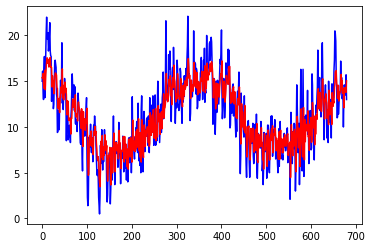

In [63]:
plt.plot(Y_tes,color="Blue")
plt.plot(Ypred,color="Red")
plt.show() #looks good

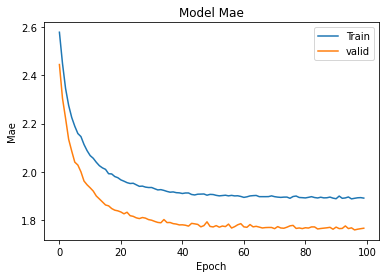

In [64]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train','valid'], loc='upper right')
plt.show()

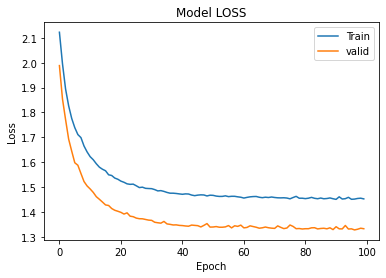

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','valid'], loc='upper right')
plt.show()